In [ ]:
from google.colab import files
uploaded = files.upload()

Saving reed_data_analyst_latest (1).csv to reed_data_analyst_latest (1).csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'. format(name= fn, length=len(uploaded[fn])))

User uploaded file "reed_data_analyst_latest (1).csv" with length 1649799 bytes


In [ ]:
#Import Libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import io

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Import required libraries :
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords

In [ ]:
import os

os.getcwd()

'/content'

In [ ]:
df= pd.read_csv(io.BytesIO(uploaded['reed_data_analyst_latest (1).csv']))
df.head()

,web-scraper-order,web-scraper-start-url,job_title_link,job_title_link-href,job_title,Company,Salary,Date,job_description,pages,pages-href
0,1628454831-1436,https://www.reed.co.uk/jobs/data-analyst-jobs-...,Data Quality Analyst,https://www.reed.co.uk/jobs/data-quality-analy...,Data Quality Analyst,Profiles Creative,"£36,000 - £38,000 per annum, negotiable, inc b...",Posted 20 July by \n\n ...,A leading online retail & groceries brand is u...,NaN,NaN
1,1628455695-1752,https://www.reed.co.uk/jobs/data-analyst-jobs-...,Data Analyst,https://www.reed.co.uk/jobs/data-analyst/43351...,Data Analyst,Profectus Recruitment,"£30,000 - £40,000 per annum",Posted 13 July by \n\n ...,Commercial Data Analyst\nLondon - Part Remote ...,2.0,https://www.reed.co.uk/jobs/data-analyst-jobs-...
2,1628455409-1639,https://www.reed.co.uk/jobs/data-analyst-jobs-...,Senior Data Analyst,https://www.reed.co.uk/jobs/senior-data-analys...,Senior Data Analyst,Data Idols,Salary negotiable,Posted 28 June by \n\n ...,Senior Data Analyst Data Idols are working wi...,NaN,NaN
3,1628455063-1527,https://www.reed.co.uk/jobs/data-analyst-jobs-...,Market Data Analyst,https://www.reed.co.uk/jobs/market-data-analys...,Market Data Analyst,James Frank Associates,"£25,000 per annum",Posted 5 July by \n\n J...,"Our client, a well-established and hugely-succ...",NaN,NaN
4,1628454193-1193,https://www.reed.co.uk/jobs/data-analyst-jobs-...,Customer Service Data Analyst,https://www.reed.co.uk/jobs/customer-service-d...,Customer Service Data Analyst,Focus Resourcing,Salary negotiable,Posted 30 July by \n\n ...,4-6 month contract to cover sabbatical Workin...,NaN,NaN


In [ ]:
#Number of instances and features in the dataset 
df.shape

(634, 11)

In [ ]:
#Get the variable type, columns names and number of rows 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      634 non-null    object 
 1   web-scraper-start-url  634 non-null    object 
 2   job_title_link         634 non-null    object 
 3   job_title_link-href    634 non-null    object 
 4   job_title              634 non-null    object 
 5   Company                634 non-null    object 
 6   Salary                 634 non-null    object 
 7   Date                   634 non-null    object 
 8   job_description        634 non-null    object 
 9   pages                  146 non-null    float64
 10  pages-href             146 non-null    object 
dtypes: float64(1), object(10)
memory usage: 54.6+ KB


In [ ]:
#Randomly retrive ten rows from the dataset 
df.sample(10)

,web-scraper-order,web-scraper-start-url,job_title_link,job_title_link-href,job_title,Company,Salary,Date,job_description,pages,pages-href
6,1628454727-1398,https://www.reed.co.uk/jobs/data-analyst-jobs-...,Data Analyst - Fintech,https://www.reed.co.uk/jobs/data-analyst-finte...,Data Analyst - Fintech,Davies Resourcing,"£35,000 - £50,000 per annum",Posted 5 July by \n\n D...,Our client is a multi-award winning FinTech co...,NaN,NaN
465,1628454334-1246,https://www.reed.co.uk/jobs/data-analyst-jobs-...,Data Entry Analyst (IT Graduate),https://www.reed.co.uk/jobs/data-entry-analyst...,Data Entry Analyst (IT Graduate),Swindale Parks (Sales & Marketing) Recruitment,"£20,000 - £25,000 per annum",Posted 27 June by \n\n ...,Data Entry Analysts We are seeking two talente...,NaN,NaN
512,1628454744-1404,https://www.reed.co.uk/jobs/data-analyst-jobs-...,MI & Data Analyst,https://www.reed.co.uk/jobs/mi-data-analyst/43...,MI & Data Analyst,Coventry Building Society,Salary negotiable,Posted 3 days ago by \n\n ...,About The Role\nWe have a great opportunity fo...,NaN,NaN
614,1628454499-1310,https://www.reed.co.uk/jobs/data-analyst-jobs-...,Impact and Performance Data Analyst,https://www.reed.co.uk/jobs/impact-and-perform...,Impact and Performance Data Analyst,Youth First,"£24,000 per annum",Posted 5 July by \n\n Y...,"Youth, Impact and Performance Data Analyst Par...",NaN,NaN
410,1628454378-1262,https://www.reed.co.uk/jobs/data-analyst-jobs-...,Data Analyst,https://www.reed.co.uk/jobs/data-analyst/43216...,Data Analyst,Aetna International,Competitive salary,Posted 1 July by \n\n A...,About Aetna Aetna are a leading diversified he...,NaN,NaN
596,1628454397-1269,https://www.reed.co.uk/jobs/data-analyst-jobs-...,Business Data Analyst / Data Business Analyst ...,https://www.reed.co.uk/jobs/business-data-anal...,Business Data Analyst / Data Business Analyst ...,Evermore Global,"£400.00 - £425.00 per day, negotiable",Posted 8 July by \n\n E...,Business Data Analyst / Data Business Analyst ...,NaN,NaN
249,1628455104-1543,https://www.reed.co.uk/jobs/data-analyst-jobs-...,HR Data Analyst,https://www.reed.co.uk/jobs/hr-data-analyst/43...,HR Data Analyst,Page Personnel Finance,"£23,000 - £25,000 per annum",Posted 20 July by \n\n ...,Page Personnel are supporting a leading organi...,NaN,NaN
338,1628455046-1520,https://www.reed.co.uk/jobs/data-analyst-jobs-...,Marketing Data Analyst,https://www.reed.co.uk/jobs/marketing-data-ana...,Marketing Data Analyst,Jobheron,Competitive salary,Posted 13 July by \n\n ...,A Marketing Data Analyst is needed to join the...,NaN,NaN
258,1628455386-1629,https://www.reed.co.uk/jobs/data-analyst-jobs-...,Data Analyst,https://www.reed.co.uk/jobs/data-analyst/43305...,Data Analyst,Macildowie Recruitment and Retention,"£35,000 - £40,000 per annum",Posted 9 July by \n\n M...,Data Analyst - Central Nottingham (Flexible Wo...,6.0,https://www.reed.co.uk/jobs/data-analyst-jobs-...
404,1628455787-1790,https://www.reed.co.uk/jobs/data-analyst-jobs-...,Data Analyst,https://www.reed.co.uk/jobs/data-analyst/42648...,Data Analyst,Remit Resources,"£35,000 - £55,000 per annum",Posted 27 July by \n\n ...,Data Analysts needed for this large profession...,NaN,NaN


In [ ]:
#How many missing values in the dataset 
df.isnull().sum()

web-scraper-order          0
web-scraper-start-url      0
job_title_link             0
job_title_link-href        0
job_title                  0
Company                    0
Salary                     0
Date                       0
job_description            0
pages                    488
pages-href               488
dtype: int64

In [ ]:
df.dtypes #getting the data types

web-scraper-order         object
web-scraper-start-url     object
job_title_link            object
job_title_link-href       object
job_title                 object
Company                   object
Salary                    object
Date                      object
job_description           object
pages                    float64
pages-href                object
dtype: object

In [ ]:
stop_words = set(stopwords.words("english"))


In [ ]:
combine_words=[]


In [ ]:
from nltk.stem import WordNetLemmatizer

wordnet= WordNetLemmatizer()

In [ ]:
from nltk.corpus import stopwords
import re
stop_words = set(stopwords.words("english"))
for values in df['job_description']:
  sen=sent_tokenize(values)
  for i in sen:
    wordings=word_tokenize(i)
    for k in wordings:
      k = k.lower()
      if k not in stop_words and (k.isalpha()):
      #final=wordnet.lemmatize(k)
        final=k
        combine_words.append(final)
  

In [ ]:
print(stop_words)

{'too', "couldn't", 'yourself', 'which', 'any', "shouldn't", 'here', 'ma', 'than', 'no', 'hasn', 'shouldn', 'what', "it's", 'be', 'having', "hasn't", 'myself', 'is', 'just', "shan't", 'yours', 'during', 'can', 're', 'do', "you'd", 'out', 'while', 'so', 'before', 'me', 'his', "aren't", "you're", 'haven', 'o', 'you', 'him', 'only', 'down', 'mustn', 'your', 'where', "you've", 'doesn', 'these', 'an', 'off', 'some', 'y', 'each', 'at', 'such', 'in', 'weren', 'didn', 'then', "didn't", "won't", "should've", 'and', 'she', 'their', 'very', 'ain', 'does', 'once', 'if', 'to', 'when', 'a', 'with', 'themselves', "needn't", 'ours', 'ourselves', 'under', 'mightn', 'doing', 'over', "haven't", 'or', 'itself', 'between', 'we', 'up', "weren't", 'whom', 'those', "doesn't", 'isn', 'it', 'll', 'our', 'again', 'couldn', 'wasn', 've', 'needn', 'most', 'both', 'my', "wouldn't", 'himself', 'them', 'through', 'should', 'this', 'being', 'by', 'yourselves', 'will', 'don', 'hadn', 'further', 'been', 'the', 's', 'for

In [ ]:
print(len(combine_words))

122481


In [ ]:
print(combine_words)

['leading', 'online', 'retail', 'groceries', 'brand', 'undergoing', 'considerable', 'investment', 'insight', 'analytics', 'teams', 'across', 'business', 'fantastic', 'opportunity', 'join', 'business', 'forefront', 'technological', 'innovation', 'working', 'entrepreneurial', 'environment', 'backing', 'huge', 'brand', 'role', 'main', 'purpose', 'role', 'drive', 'data', 'quality', 'improvement', 'across', 'business', 'data', 'governance', 'programme', 'associated', 'data', 'governance', 'council', 'detailed', 'data', 'analysis', 'tools', 'dashboards', 'monitor', 'quality', 'provide', 'alerts', 'data', 'users', 'monitor', 'assess', 'resolve', 'data', 'quality', 'issues', 'edw', 'data', 'marts', 'reporting', 'solutions', 'business', 'questions', 'data', 'bridge', 'data', 'insight', 'profile', 'new', 'data', 'sources', 'provide', 'input', 'integration', 'design', 'business', 'users', 'analysts', 'capture', 'business', 'rules', 'data', 'quality', 'rules', 'enterprise', 'data', 'model', 'line'

In [ ]:
#df['without_stopwords'].values #getting the records containing the list of clean words (after removal of punction and stopwords)

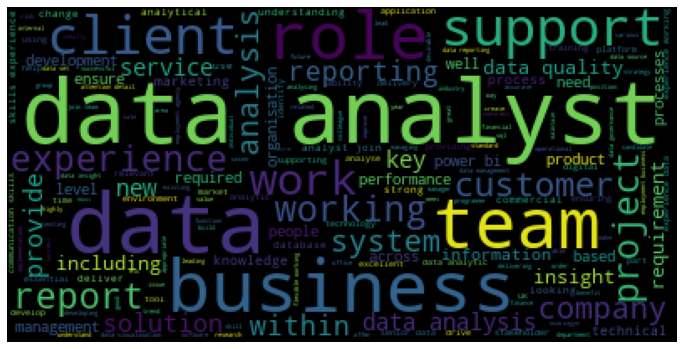

In [ ]:
#Library to form wordcloud :
from wordcloud import WordCloud

#Library to plot the wordcloud :
import matplotlib.pyplot as plt

#comment_words += " ".join(words_combine)+" "
comment_words = " ".join(str(v) for v in combine_words) 
#Generating the wordcloud :
wordcloud = WordCloud().generate(comment_words)

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()

#Word2Vec

In [ ]:
import os
import sys
import re
#from gensim.models import Word2Vec
from gensim.models import word2vec



In [ ]:
# Set values for various parameters
feature_size = 100   # Word vector dimensionality  
window_context = 1000          # Context window size                                                                                    
min_word_count = 5   # Minimum word count                        
sample = 1e-7   # Downsample setting for frequent words

In [ ]:
w2v_model = word2vec.Word2Vec([combine_words], size=feature_size, window=window_context, min_count=min_word_count,sample=sample)

In [ ]:
# w2v_model = word2vec.Word2Vec([combine_words], size=feature_size, min_count=min_word_count,sample=sample)

In [ ]:
w2v_model

In [ ]:
w2v_model.vector_size

100

In [ ]:
w2v_model.wv.most_similar('python')[:15]

[('data', 0.9998562335968018),
 ('role', 0.9998493790626526),
 ('tools', 0.999840259552002),
 ('responsibilities', 0.9998251795768738),
 ('reporting', 0.9998242855072021),
 ('analyst', 0.9998230934143066),
 ('well', 0.9998223185539246),
 ('ability', 0.999817967414856),
 ('improvement', 0.999815046787262),
 ('quality', 0.9998098611831665)]

In [ ]:
w2v_model.wv

In [ ]:
# similar_words = {search_term: [item for item in w2v_model.wv.most_similar([search_term])[:20]]
#                   for search_term in ['governance','requirements','data','quality','processes','business','management','insights','reporting','join','sql','bi','skills','excel','analysis','powerbi','power','knowledge','information','marketing','visualization','warehouse','azure','tools','development','solutions']}
# similar_words

In [ ]:
similar_words = {search_term: [item for item in w2v_model.wv.most_similar([search_term])[:15]]
                  for search_term in ['data','ability','reporting','sql','bi','excel','analysis','powerbi','visualization','warehouse','azure','tools','development']}
similar_words

{'ability': [('data', 0.9998883605003357),
  ('reporting', 0.9998711943626404),
  ('role', 0.999864935874939),
  ('responsibilities', 0.9998626112937927),
  ('employment', 0.9998592138290405),
  ('well', 0.999855637550354),
  ('tools', 0.9998488426208496),
  ('new', 0.9998459815979004),
  ('proven', 0.9998458623886108),
  ('quality', 0.9998453855514526)],
 'analysis': [('experience', 0.9995925426483154),
  ('reporting', 0.9995782375335693),
  ('data', 0.9995663166046143),
  ('role', 0.999565064907074),
  ('tools', 0.999554455280304),
  ('experienced', 0.999548077583313),
  ('responsibilities', 0.9995392560958862),
  ('business', 0.9995302557945251),
  ('sql', 0.9995189905166626),
  ('analyst', 0.9995136857032776)],
 'azure': [('role', 0.9993387460708618),
  ('closely', 0.9993146061897278),
  ('using', 0.9993120431900024),
  ('analyst', 0.9992940425872803),
  ('opportunity', 0.9992921352386475),
  ('responsibilities', 0.9992899894714355),
  ('attention', 0.9992820024490356),
  ('reports